<a href="https://colab.research.google.com/github/MDRobiulhassan/Machine-Learning-Course/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv('/content/drive/MyDrive/University/7th Semester/MLL/colab/train.csv')

In [3]:
df.head()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,...,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0,1.0
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,...,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0,1.0
2,2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,...,Male,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0,0.0
3,3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,...,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0,1.0
4,4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,...,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0,1.0


In [4]:
df.shape

(700000, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 26 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  700000 non-null  int64  
 1   age                                 700000 non-null  int64  
 2   alcohol_consumption_per_week        700000 non-null  int64  
 3   physical_activity_minutes_per_week  700000 non-null  int64  
 4   diet_score                          700000 non-null  float64
 5   sleep_hours_per_day                 700000 non-null  float64
 6   screen_time_hours_per_day           700000 non-null  float64
 7   bmi                                 700000 non-null  float64
 8   waist_to_hip_ratio                  700000 non-null  float64
 9   systolic_bp                         700000 non-null  int64  
 10  diastolic_bp                        700000 non-null  int64  
 11  heart_rate                

In [6]:
df.isna().sum().T

,0
id,0
age,0
alcohol_consumption_per_week,0
physical_activity_minutes_per_week,0
diet_score,0
sleep_hours_per_day,0
screen_time_hours_per_day,0
bmi,0
waist_to_hip_ratio,0
systolic_bp,0


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
id,700000.0,349999.500000,202072.738554,0.00,174999.75,349999.50,524999.25,699999.00
age,700000.0,50.359734,11.655520,19.00,42.00,50.00,58.00,89.00
alcohol_consumption_per_week,700000.0,2.072411,1.048189,1.00,1.00,2.00,3.00,9.00
physical_activity_minutes_per_week,700000.0,80.230803,51.195071,1.00,49.00,71.00,96.00,747.00
diet_score,700000.0,5.963695,1.463336,0.10,5.00,6.00,7.00,9.90
sleep_hours_per_day,700000.0,7.002200,0.901907,3.10,6.40,7.00,7.60,9.90
screen_time_hours_per_day,700000.0,6.012733,2.022707,0.60,4.60,6.00,7.40,16.50
bmi,700000.0,25.874684,2.860705,15.10,23.90,25.90,27.80,38.40
waist_to_hip_ratio,700000.0,0.858766,0.037980,0.68,0.83,0.86,0.88,1.05
systolic_bp,700000.0,116.294193,11.010390,91.00,108.00,116.00,124.00,163.00


In [9]:
import pandas as pd

outlier_summary = []

numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outlier_count = ((df[col] < lower) | (df[col] > upper)).sum()

    if outlier_count > 0:
        outlier_summary.append({
            'feature': col,
            'Q1': Q1,
            'Q3': Q3,
            'lower_bound': lower,
            'upper_bound': upper,
            'outlier_count': outlier_count
        })

outlier_df = pd.DataFrame(outlier_summary)
outlier_df


,feature,Q1,Q3,lower_bound,upper_bound,outlier_count
0,age,42.00,58.00,18.000,82.000,1013
1,alcohol_consumption_per_week,1.00,3.00,-2.000,6.000,509
2,physical_activity_minutes_per_week,49.00,96.00,-21.500,166.500,33490
3,diet_score,5.00,7.00,2.000,10.000,1997
4,sleep_hours_per_day,6.40,7.60,4.600,9.400,6152
5,screen_time_hours_per_day,4.60,7.40,0.400,11.600,2337
6,bmi,23.90,27.80,18.050,33.650,4254
7,waist_to_hip_ratio,0.83,0.88,0.755,0.955,6159
8,systolic_bp,108.00,124.00,84.000,148.000,775
9,diastolic_bp,71.00,80.00,57.500,93.500,5752


In [10]:
cols_to_drop = ['id', 'family_history_diabetes', 'hypertension_history', 'cardiovascular_history']

df = df.drop(columns=cols_to_drop)

print(df.columns)

Index(['age', 'alcohol_consumption_per_week',
       'physical_activity_minutes_per_week', 'diet_score',
       'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi',
       'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate',
       'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol',
       'triglycerides', 'gender', 'ethnicity', 'education_level',
       'income_level', 'smoking_status', 'employment_status',
       'diagnosed_diabetes'],
      dtype='object')


In [11]:
import pandas as pd

outlier_summary = []

numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outlier_count = ((df[col] < lower) | (df[col] > upper)).sum()

    if outlier_count > 0:
        outlier_summary.append({
            'feature': col,
            'Q1': Q1,
            'Q3': Q3,
            'lower_bound': lower,
            'upper_bound': upper,
            'outlier_count': outlier_count
        })

outlier_df = pd.DataFrame(outlier_summary)
outlier_df

,feature,Q1,Q3,lower_bound,upper_bound,outlier_count
0,age,42.00,58.00,18.000,82.000,1013
1,alcohol_consumption_per_week,1.00,3.00,-2.000,6.000,509
2,physical_activity_minutes_per_week,49.00,96.00,-21.500,166.500,33490
3,diet_score,5.00,7.00,2.000,10.000,1997
4,sleep_hours_per_day,6.40,7.60,4.600,9.400,6152
5,screen_time_hours_per_day,4.60,7.40,0.400,11.600,2337
6,bmi,23.90,27.80,18.050,33.650,4254
7,waist_to_hip_ratio,0.83,0.88,0.755,0.955,6159
8,systolic_bp,108.00,124.00,84.000,148.000,775
9,diastolic_bp,71.00,80.00,57.500,93.500,5752


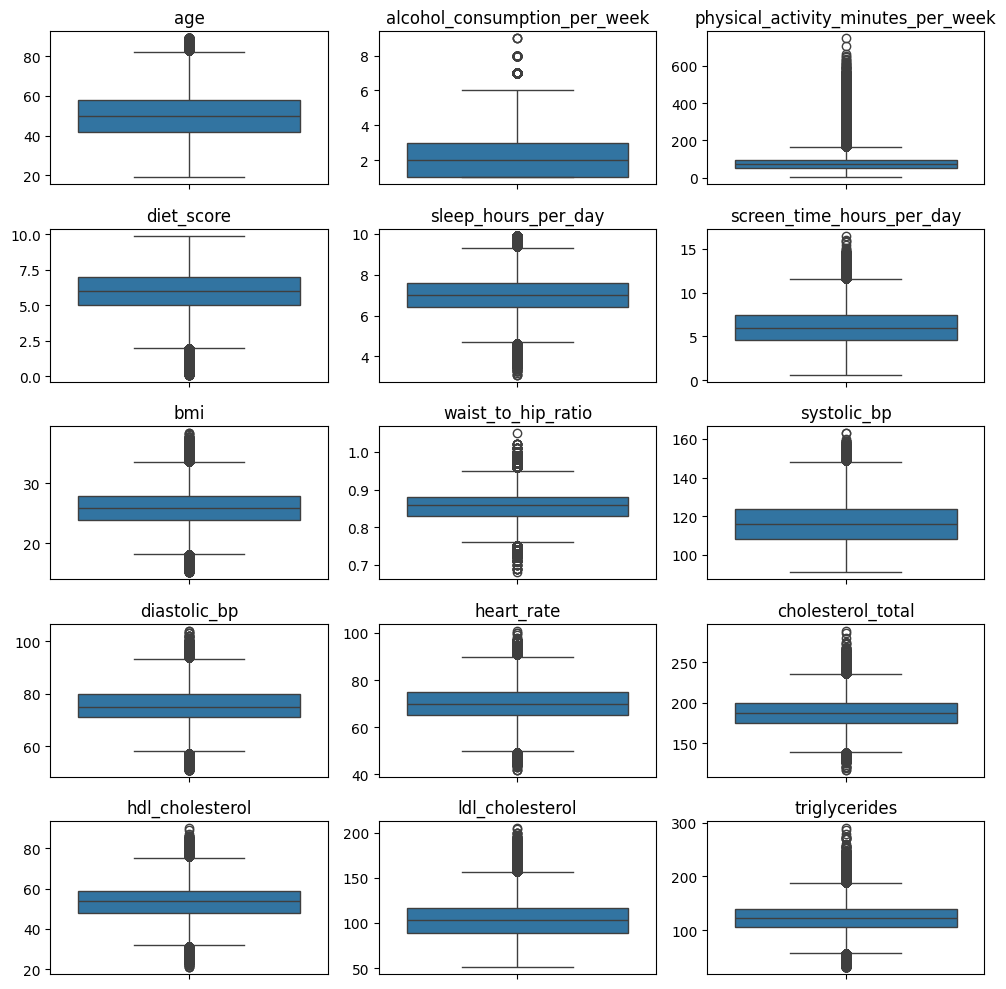

In [12]:
numeric_features = [
    'age', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week',
    'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi',
    'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate',
    'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides'
]

rows = 5
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(10, 10))

axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    sns.boxplot(y=df[feature], ax=axes[i])
    axes[i].set_title(feature)
    axes[i].set_ylabel('')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [13]:
numeric_features = [
    'age', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week',
    'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi',
    'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate',
    'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides'
]

for feature in numeric_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[feature] = df[feature].clip(lower, upper)

print("Outliers have been capped.")


Outliers have been capped.


In [14]:
capped_summary = []

for feature in numeric_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    capped_summary.append([feature, Q1, Q3, lower, upper, 0])

capped_df = pd.DataFrame(capped_summary, columns=['feature','Q1','Q3','lower_bound','upper_bound','outlier_count'])

capped_df


,feature,Q1,Q3,lower_bound,upper_bound,outlier_count
0,age,42.00,58.00,18.000,82.000,0
1,alcohol_consumption_per_week,1.00,3.00,-2.000,6.000,0
2,physical_activity_minutes_per_week,49.00,96.00,-21.500,166.500,0
3,diet_score,5.00,7.00,2.000,10.000,0
4,sleep_hours_per_day,6.40,7.60,4.600,9.400,0
5,screen_time_hours_per_day,4.60,7.40,0.400,11.600,0
6,bmi,23.90,27.80,18.050,33.650,0
7,waist_to_hip_ratio,0.83,0.88,0.755,0.955,0
8,systolic_bp,108.00,124.00,84.000,148.000,0
9,diastolic_bp,71.00,80.00,57.500,93.500,0


In [15]:
df['alcohol_consumption_per_week'].describe()

,alcohol_consumption_per_week
count,700000.000000
mean,2.071591
std,1.044627
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,6.000000


In [16]:
df['physical_activity_minutes_per_week'].describe()

,physical_activity_minutes_per_week
count,700000.000000
mean,76.483997
std,37.160392
min,1.000000
25%,49.000000
50%,71.000000
75%,96.000000
max,166.500000


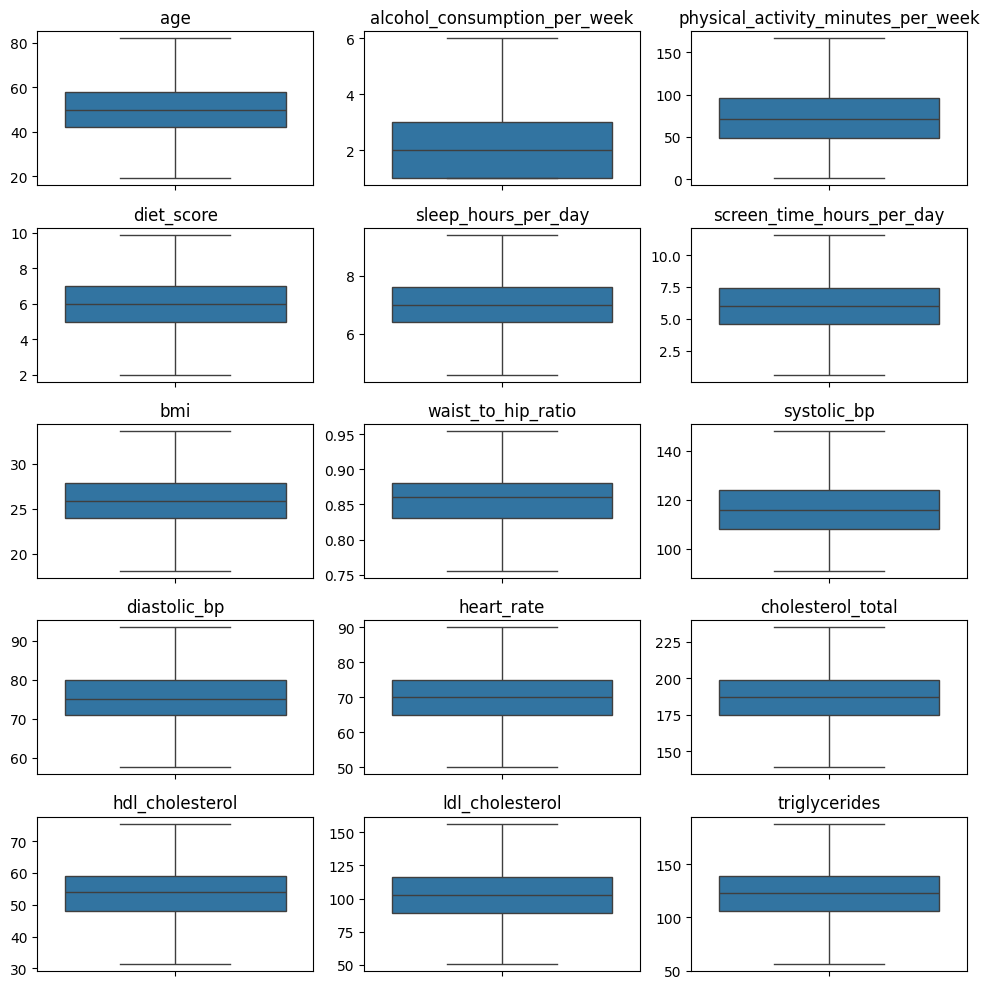

In [17]:
numeric_features = [
    'age', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week',
    'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi',
    'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate',
    'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides'
]

rows = 5
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(10, 10))

axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    sns.boxplot(y=df[feature], ax=axes[i])
    axes[i].set_title(feature)
    axes[i].set_ylabel('')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

In [19]:
X = df.drop(columns=['diagnosed_diabetes'])
y = df['diagnosed_diabetes']

In [20]:
numeric_features = X.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

In [21]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X[numeric_features]), columns=numeric_features)

In [22]:
X_encoded = pd.get_dummies(X[categorical_features], drop_first=True)

In [23]:
X_final = pd.concat([X_scaled, X_encoded], axis=1)
print(f"Total features after encoding: {X_final.shape[1]}")

Total features after encoding: 33


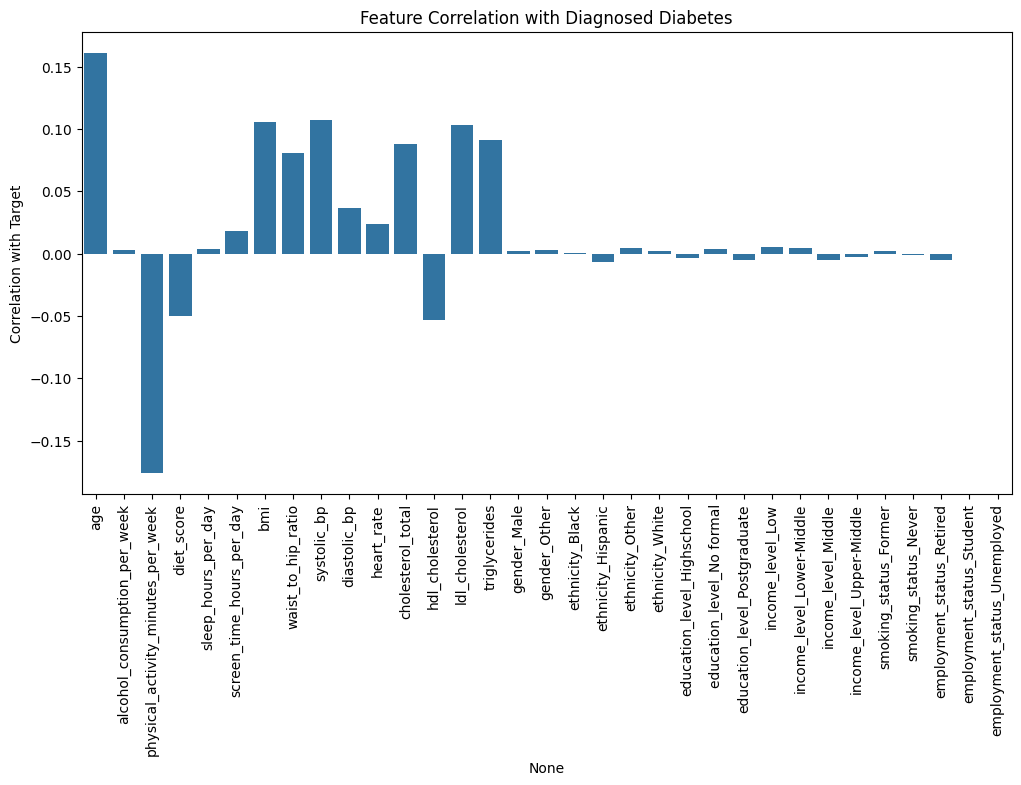

In [24]:
corr_matrix = X_final.corrwith(y)
plt.figure(figsize=(12,6))
sns.barplot(x=corr_matrix.index, y=corr_matrix.values)
plt.xticks(rotation=90)
plt.ylabel("Correlation with Target")
plt.title("Feature Correlation with Diagnosed Diabetes")
plt.show()

In [25]:
low_corr_features = corr_matrix[abs(corr_matrix) < 0.01].index.tolist()
print("Low correlation features:", low_corr_features)

Low correlation features: ['alcohol_consumption_per_week', 'sleep_hours_per_day', 'gender_Male', 'gender_Other', 'ethnicity_Black', 'ethnicity_Hispanic', 'ethnicity_Other', 'ethnicity_White', 'education_level_Highschool', 'education_level_No formal', 'education_level_Postgraduate', 'income_level_Low', 'income_level_Lower-Middle', 'income_level_Middle', 'income_level_Upper-Middle', 'smoking_status_Former', 'smoking_status_Never', 'employment_status_Retired', 'employment_status_Student', 'employment_status_Unemployed']


In [26]:
selector_uni = SelectKBest(score_func=f_regression, k=15)  # Select top 15 features
selector_uni.fit(X_final, y)
selected_uni_features = X_final.columns[selector_uni.get_support()].tolist()
print("Top features from Univariate Selection:", selected_uni_features)

Top features from Univariate Selection: ['age', 'physical_activity_minutes_per_week', 'diet_score', 'screen_time_hours_per_day', 'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides', 'ethnicity_Hispanic', 'income_level_Low']


In [27]:
lr = LinearRegression()
rfe = RFE(estimator=lr, n_features_to_select=15)
rfe.fit(X_final, y)
selected_rfe_features = X_final.columns[rfe.support_].tolist()
print("Top features from RFE:", selected_rfe_features)

Top features from RFE: ['age', 'physical_activity_minutes_per_week', 'diet_score', 'screen_time_hours_per_day', 'bmi', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides', 'gender_Other', 'ethnicity_Hispanic', 'ethnicity_Other', 'education_level_No formal', 'employment_status_Retired']


In [28]:
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_final, y)

LassoCV(cv=5, random_state=42)

In [29]:
selected_lasso_features = X_final.columns[lasso.coef_ != 0].tolist()
print("Top features from Lasso Regression:", selected_lasso_features)

Top features from Lasso Regression: ['age', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides', 'gender_Male', 'gender_Other', 'ethnicity_Black', 'ethnicity_Hispanic', 'ethnicity_Other', 'ethnicity_White', 'education_level_Highschool', 'education_level_No formal', 'education_level_Postgraduate', 'income_level_Low', 'income_level_Lower-Middle', 'income_level_Middle', 'income_level_Upper-Middle', 'smoking_status_Former', 'employment_status_Retired']


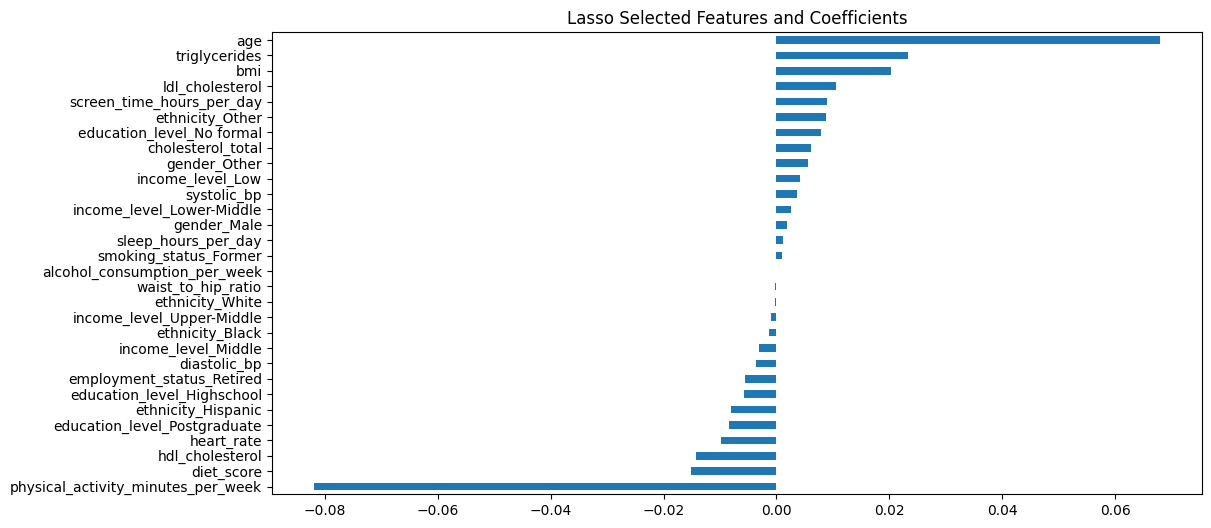

In [30]:
plt.figure(figsize=(12,6))
coef = pd.Series(lasso.coef_, index=X_final.columns)
coef[coef != 0].sort_values().plot(kind='barh')
plt.title("Lasso Selected Features and Coefficients")
plt.show()

In [31]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_final, y)

RandomForestRegressor(random_state=42)

In [32]:
feat_importances = pd.Series(rf.feature_importances_, index=X_final.columns)
top_tree_features = feat_importances.sort_values(ascending=False).head(15).index.tolist()

In [33]:
print("Top features from Random Forest:", top_tree_features)

Top features from Random Forest: ['physical_activity_minutes_per_week', 'screen_time_hours_per_day', 'bmi', 'triglycerides', 'age', 'diet_score', 'systolic_bp', 'sleep_hours_per_day', 'ldl_cholesterol', 'cholesterol_total', 'diastolic_bp', 'heart_rate', 'hdl_cholesterol', 'waist_to_hip_ratio', 'alcohol_consumption_per_week']


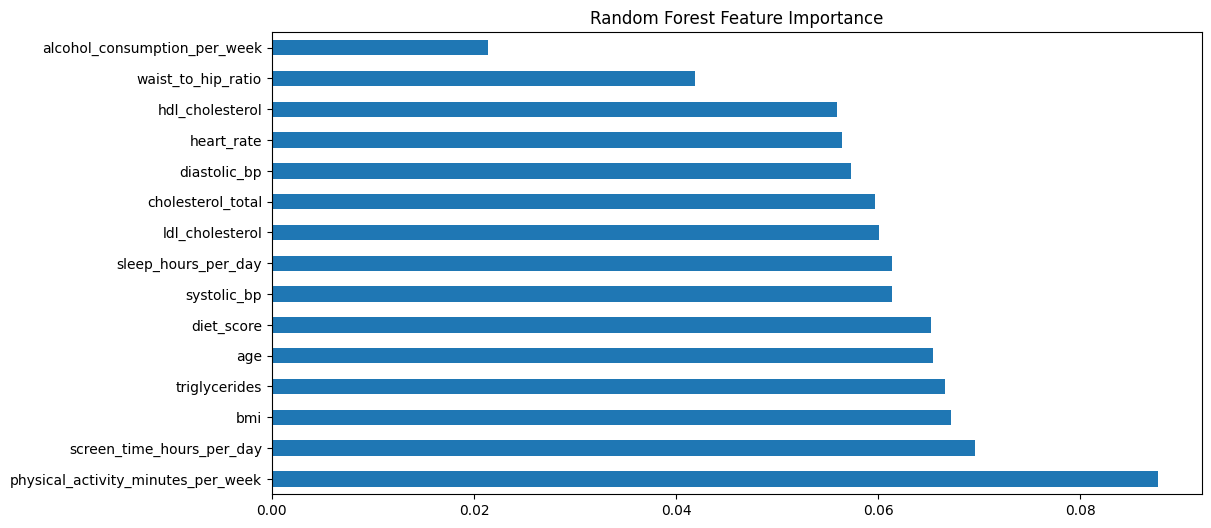

In [34]:
plt.figure(figsize=(12,6))
feat_importances.sort_values(ascending=False).head(15).plot(kind='barh')
plt.title("Random Forest Feature Importance")
plt.show()

In [35]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_final)
print(f"Original features: {X_final.shape[1]}, Features after PCA: {X_pca.shape[1]}")

Original features: 33, Features after PCA: 20


In [54]:
final_features = list(set(selected_uni_features + selected_rfe_features + selected_lasso_features + top_tree_features))
print("Final selected features to use for modeling:", final_features)

Final selected features to use for modeling: ['screen_time_hours_per_day', 'triglycerides', 'heart_rate', 'income_level_Low', 'cholesterol_total', 'education_level_Postgraduate', 'ethnicity_Hispanic', 'diet_score', 'systolic_bp', 'physical_activity_minutes_per_week', 'gender_Male', 'ethnicity_Black', 'education_level_Highschool', 'waist_to_hip_ratio', 'ldl_cholesterol', 'sleep_hours_per_day', 'hdl_cholesterol', 'alcohol_consumption_per_week', 'diastolic_bp', 'ethnicity_Other', 'gender_Other', 'smoking_status_Former', 'income_level_Upper-Middle', 'income_level_Lower-Middle', 'age', 'bmi', 'income_level_Middle', 'education_level_No formal', 'employment_status_Retired', 'ethnicity_White']


In [55]:
X_selected = X_final[final_features]

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [57]:
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)

In [58]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [59]:
y_pred = model.predict(X_test)


In [60]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [64]:
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

Mean Squared Error (MSE): 0.2188
R^2 Score: 0.0674


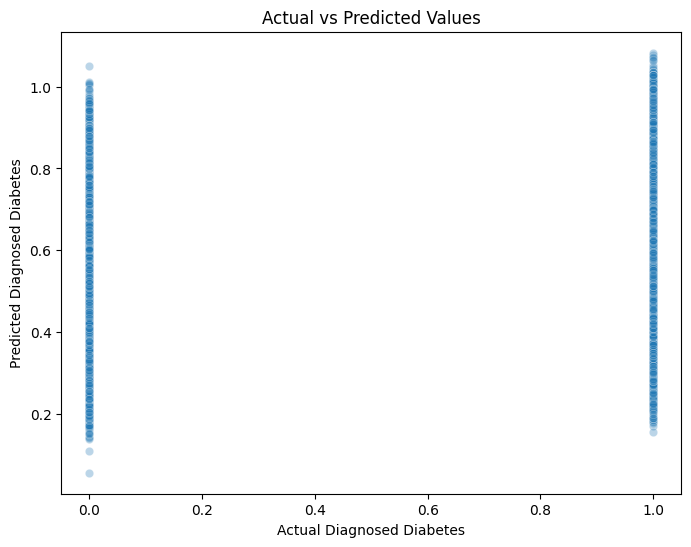

In [62]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)
plt.xlabel("Actual Diagnosed Diabetes")
plt.ylabel("Predicted Diagnosed Diabetes")
plt.title("Actual vs Predicted Values")
plt.show()